In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from networkx.drawing.nx_pydot import graphviz_layout, write_dot

class Node:
    def __init__(self, id = None):
        self.id = id
        self.color = 'white'
        self.predecessor = None
        self.distance = None
        self.neighbours = []
        self.f = None
        self.weight = 0

class FIFO:
    def __init__(self):
        self.queue = []

    def enqueue(self, x):
        self.queue.insert(0, x)
    
    def dequeue(self):
        value =  self.queue.pop()
        print(value.id)
        return value
    
    def is_empty(self):
        return len(self.queue) == 0
    
    def head(self):
        return self.queue[-1]

    def length(self):
      return len(self.queue)

    
class LIFO:
    def __init__(self):
        self.queue = []
    
    def enqueue(self, x):
        self.queue.append(x)
    
    def dequeue(self):
        value = self.queue.pop()
        print(value)
        return value
    
    def is_empty(self):
        return len(self.queue) == 0

    def length(self):
      return len(self.queue)



class Graph:
    def __init__(self):
        self.letsgo = "yes"

    def add_vertices(self, v):
        self.root = Node(v[0])
        self.vertices = [self.root]
        for i in range(1, len(v)):
            self.vertices.append(Node(v[i]))
    
    def add_adj_d(self, e):
        self.adj = []
        for e_ in e:
            a = e_[0]
            b = e_[1]
            v1 = self.vertices[a]
            v2 = self.vertices[b]
            v2.neighbours.append(v1)
            self.adj.append([v1, v2])
  
    def display_directed(self):
        G = nx.DiGraph()

        for v in self.vertices:
            G.add_node(v.id, color = v.color)

        for adj in self.adj:
            G.add_edge(adj[0].id, adj[1].id)
        
        color_map = nx.get_node_attributes(G, "color")
        #print(color_map)

        for key in color_map:
            if color_map[key] == "white":
                color_map[key] = "lightgrey"

            typ_colors = [color_map.get(node) for node in G.nodes()]

        write_dot(G,'test.dot')
        pos = graphviz_layout(G, prog="dot")
        nx.draw(G, pos, with_labels = True, node_color = typ_colors)
        plt.show()

    def display_directed_operate(self, time, typ=None):
        G = nx.DiGraph()

        for v in self.topological_sort_queue:
            G.add_node(v.id, color = v.color)

        for adj in self.adj:
            G.add_edge(adj[0].id, adj[1].id)
        
        color_map = nx.get_node_attributes(G, "color")

        for key in color_map:
            if color_map[key] == "white":
                color_map[key] = "lightgrey"

            typ_colors = [color_map.get(node) for node in G.nodes()]

        write_dot(G,'test.dot')
        pos = graphviz_layout(G, prog="dot")
        nx.draw(G, pos, with_labels = True, node_color = typ_colors)
        plt.title(f"Moment: {time}")
        plt.show()

  
    def DFS_complete(self, typ=None):
      if typ is None:
        for u in self.vertices:
          u.color = 'white'
          u.predecessor = None
      else:
        for u in self.vertices2:
          u.color = 'white'
          u.predecessor = None

      self.t = 0
      if typ is None:
        self.display_directed()

      if typ is None:
        for u in self.vertices:
          if u.color == 'white':
            self.DFS_visit(u)
      else:
        for u in self.vertices2:
          if u.color == 'white':
            self.DFS_visit(u, typ=typ)


    def DFS_visit(self, u, typ=None):
      u.color = 'red'
      self.t = self.t + 1
      u.distance = self.t

      if typ is None:
        self.display_directed()

      for v in u.neighbours:
        if v.color == 'white':
          v.predecessor = u
          self.DFS_visit(v, typ=typ)
      u.color = 'black'
      self.queue.enqueue(u)
      self.t = self.t + 1
      u.f = self.t
      
      if typ is None:
        self.display_directed()

    def add_weight_to_vertices(self):   #czas wykonania - randomowe 1-10
      for u in self.vertices:
        r = random.randint(1, 10)
        u.weight = r

    def topological_sort(self, typ=None):
      self.queue = FIFO()

      if typ is None:
        self.DFS_complete()
      else:
        self.DFS_complete(typ=typ)

      self.topological_sort_queue = [] 

      for i in range(0, self.queue.length()):
        q = self.queue.dequeue()
        self.topological_sort_queue.append(q)
        print("ID:", q.id, "weight:", q.weight, "f:", q.f)
  
    def operate(self):
    
      self.topological_sort()
      temp_time = 0

      for v in self.vertices:
        v.color = 'white'
      
      print()
      print("OPERACJE:")
      print()

      self.display_directed_operate(temp_time)
      for v in self.topological_sort_queue:
        
        v.color = 'orange'  #teraz się wykonuje
        self.display_directed_operate(temp_time)
        temp_time += v.weight
        v.color = 'green'

    def find_minimal_starting_position(self, o):
      
      self.vertices2 = self.vertices.copy() #!
      self.vertices2[0], self.vertices2[o] = self.vertices2[o], self.vertices2[0] #we are starting from node - 'o'

      print([v.id for v in self.vertices])
      print([v.id for v in self.vertices2])    

      self.topological_sort(typ=2)     
      temp_time = 0

      for v in self.vertices2:
        v.color = 'white'

      print()
      print("OPERACJE:")
      print()

      self.display_directed_operate(temp_time)
      o_time = 0

      for v in self.topological_sort_queue:
        if v.id == o:
          o_time = temp_time

        v.color = 'orange' #teraz się wykonuje
        self.display_directed_operate(temp_time)
        temp_time += v.weight
        v.color = 'green'

      print()
      print("Czas zaczęcia", o, "operacji to:", o_time)


<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


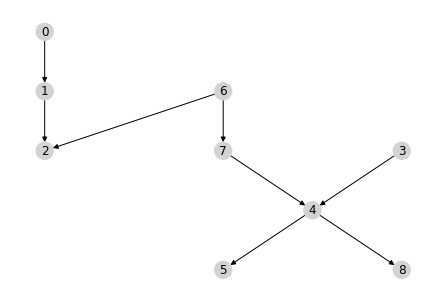


DFS complete.
________________________________




<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


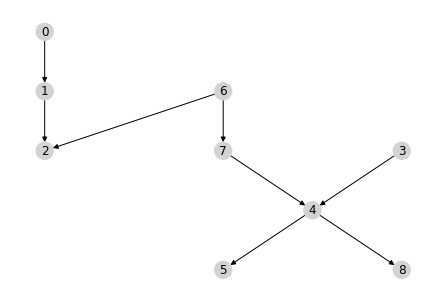

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


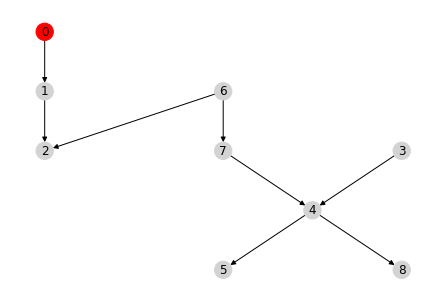

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


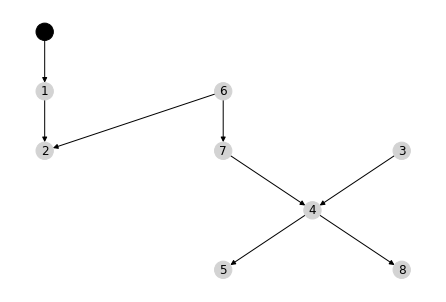

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


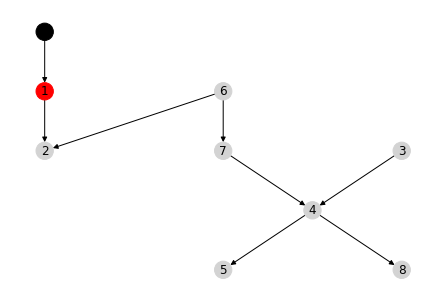

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


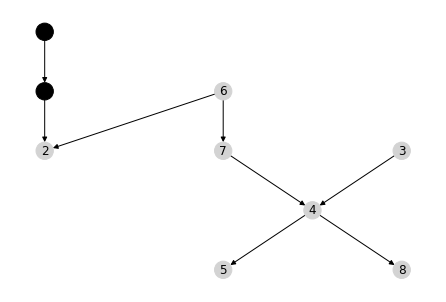

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


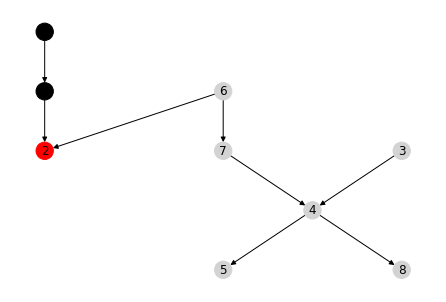

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


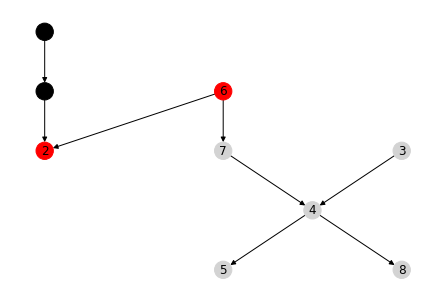

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


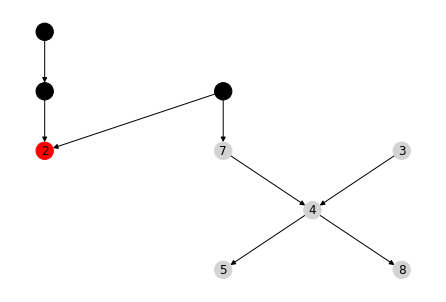

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


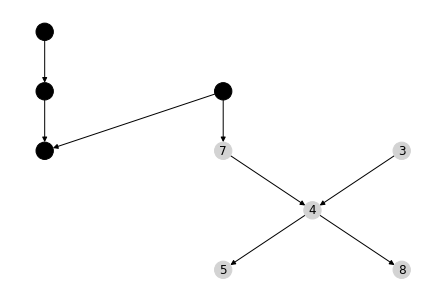

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


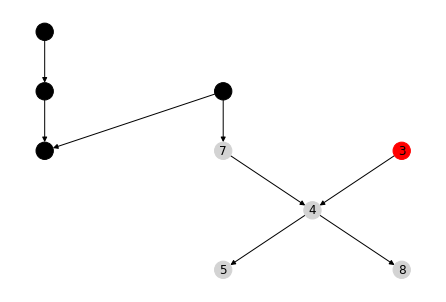

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


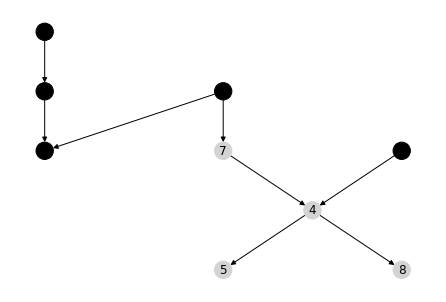

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


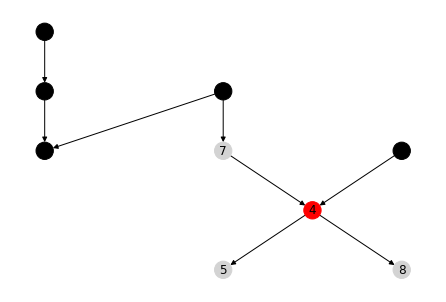

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


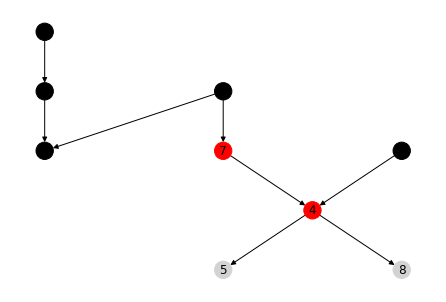

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


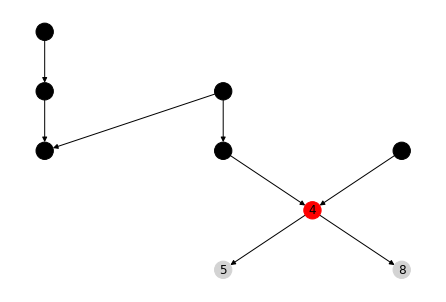

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


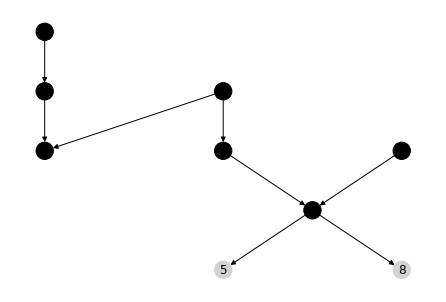

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


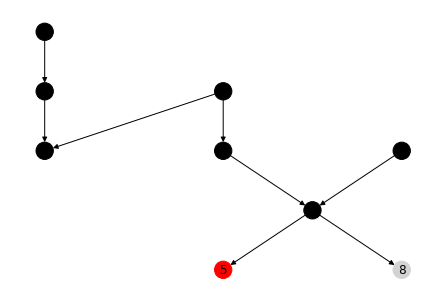

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


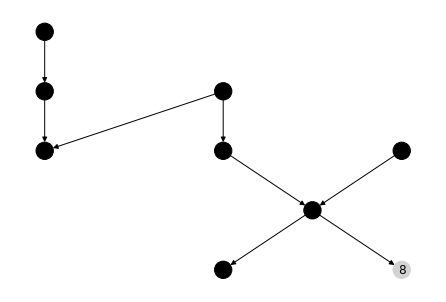

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


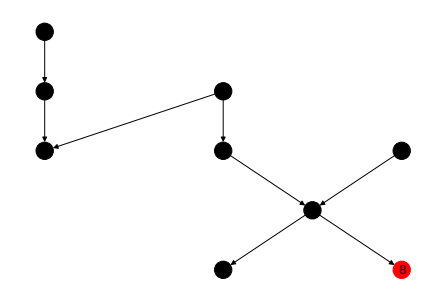

<ipython-input-4-9fef745c2882>:103: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


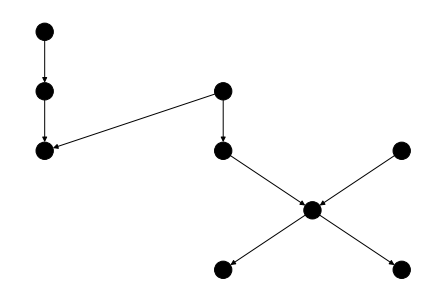

0
ID: 0 weight: 3 f: 2
1
ID: 1 weight: 9 f: 4
6
ID: 6 weight: 2 f: 7
2
ID: 2 weight: 5 f: 8
3
ID: 3 weight: 1 f: 10
7
ID: 7 weight: 9 f: 13
4
ID: 4 weight: 7 f: 14
5
ID: 5 weight: 10 f: 16
8
ID: 8 weight: 6 f: 18

OPERACJE:



<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


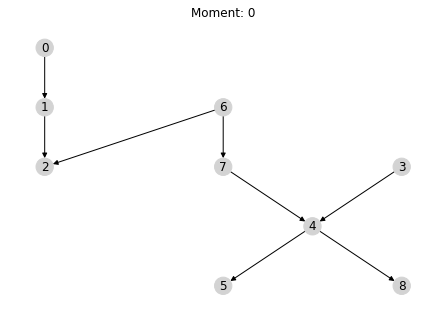

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


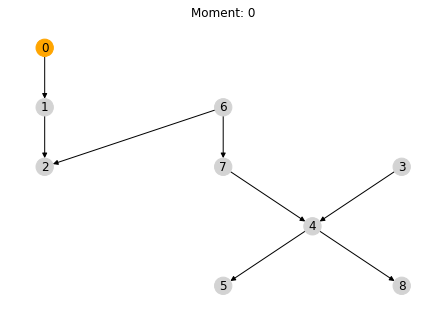

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


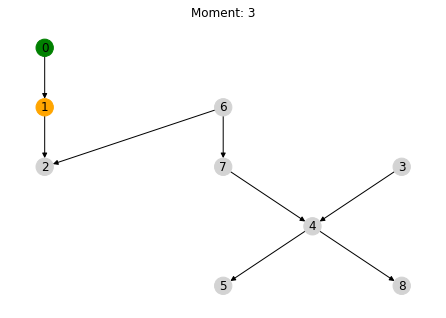

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


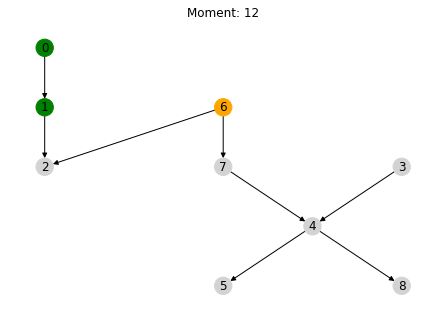

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


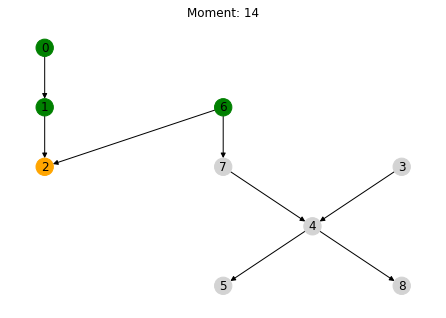

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


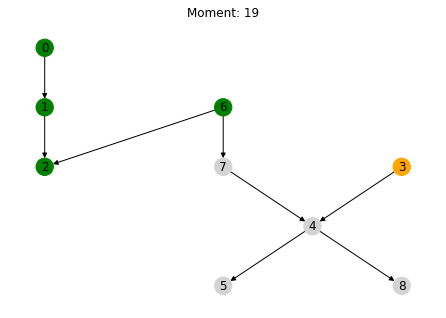

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


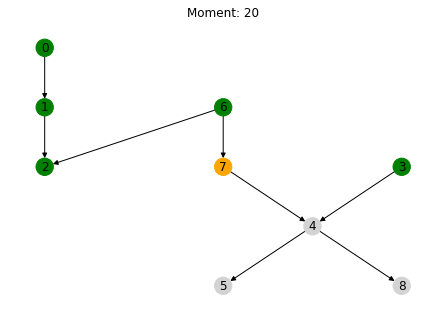

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


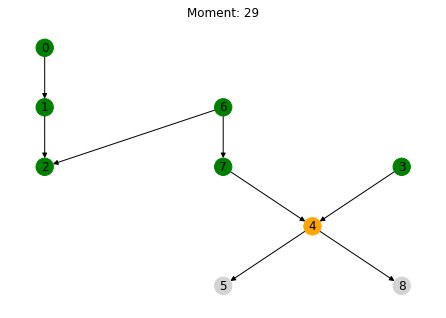

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


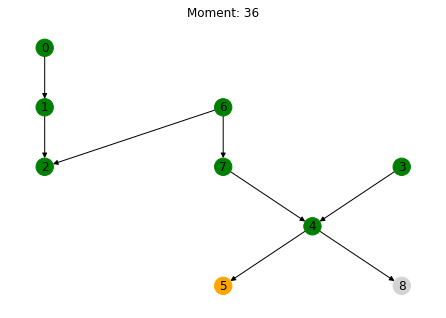

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


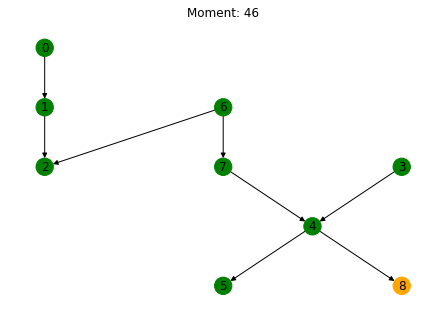


topological sort.
________________________________


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[4, 1, 2, 3, 0, 5, 6, 7, 8]
6
ID: 6 weight: 2 f: 4
7
ID: 7 weight: 9 f: 5
3
ID: 3 weight: 1 f: 7
4
ID: 4 weight: 7 f: 8
0
ID: 0 weight: 3 f: 11
1
ID: 1 weight: 9 f: 12
2
ID: 2 weight: 5 f: 14
5
ID: 5 weight: 10 f: 16
8
ID: 8 weight: 6 f: 18

OPERACJE:



<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


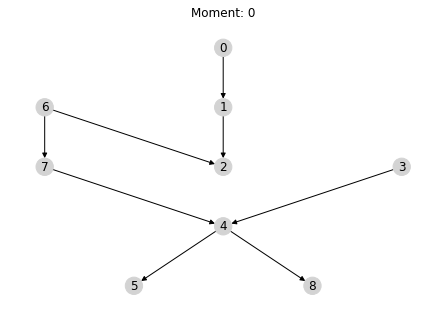

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


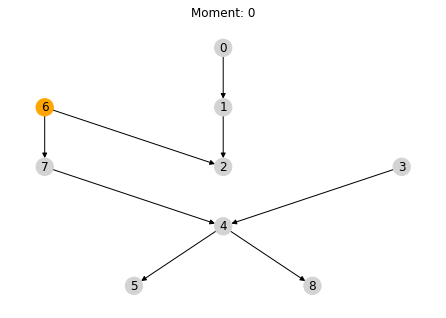

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


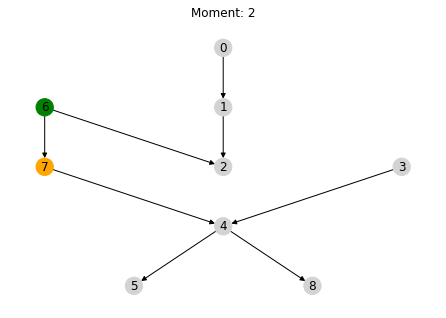

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


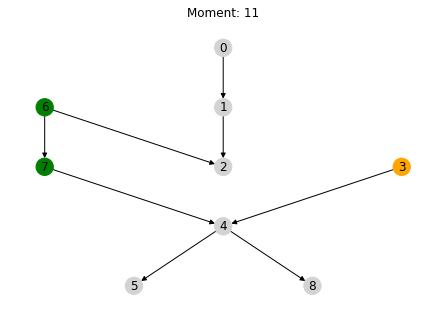

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


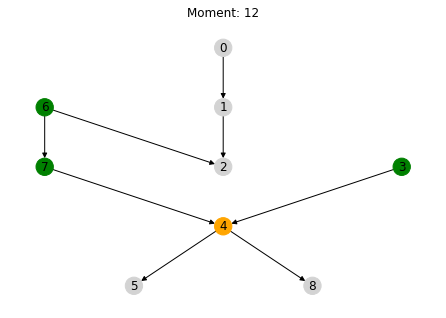

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


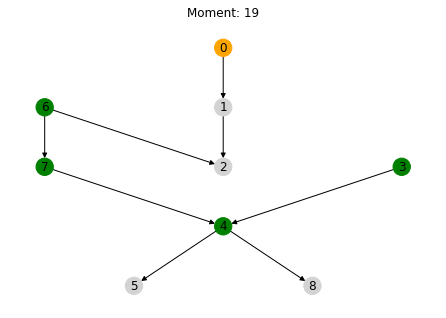

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


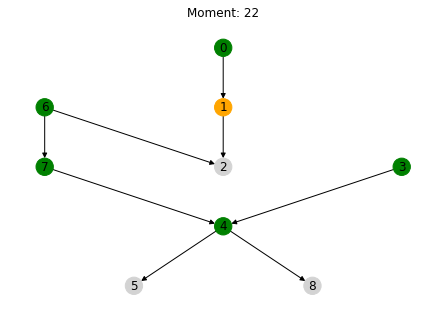

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


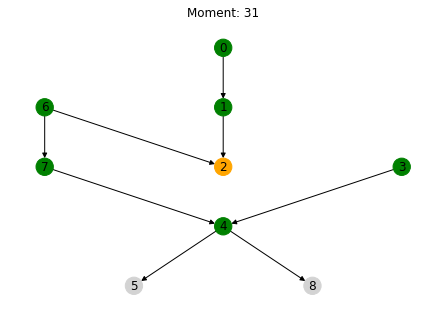

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


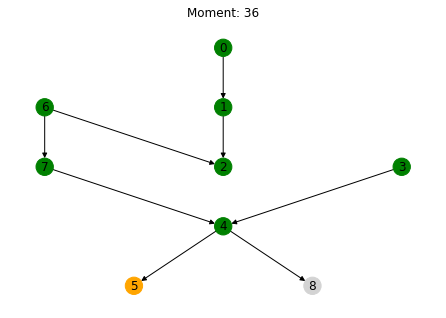

<ipython-input-4-9fef745c2882>:130: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


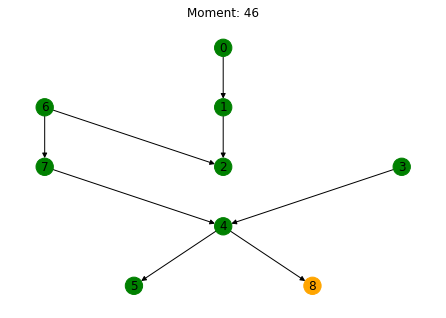


Czas zaczęcia 4 operacji to: 12


In [7]:
#example
V = [0, 1, 2, 3, 4, 5, 6, 7, 8]
E = [[0, 1], [1, 2], [6, 2], [6, 7], [7, 4], [3, 4], [4, 5], [4, 8]]

object1 = Graph()
object1.add_vertices(V)
object1.add_adj_d(E)
object1.add_weight_to_vertices()

object1.display_directed()

#3 podpunkt
print("\nDFS complete.")
print("________________________________\n\n")

object1.operate()

#4 podpunkt

print("\ntopological sort.")
print("________________________________\n\n")
object1.find_minimal_starting_position(4)
